# ENGSCI 762 - AS1 - Part I
## Noel D'Souza - ndso092 - 449609993

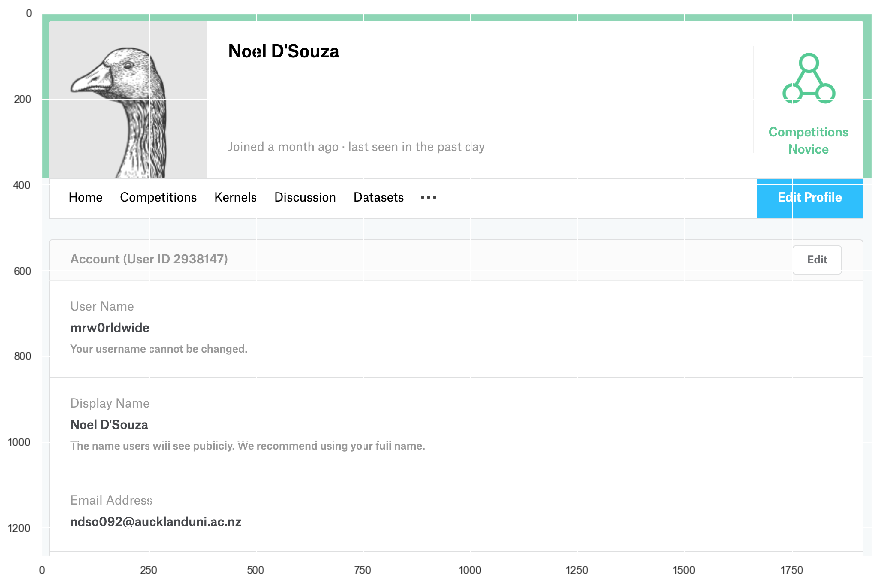

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from string import ascii_letters
sns.set()

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Kaggle Account Setup Evidence
dirPic = mpimg.imread("AS1/kaggle.png")
f, ax = plt.subplots(figsize=(15, 10))
implot = plt.imshow(dirPic, aspect=1)

## Frame the Problem

This project has the following business objectives:

* Predict final sales prices of each home in Ames, Iowa using the Ames Housing dataset containing a set of explanatory variables.
* The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. These include: the years and months of construction or remodel, the interior and exterior quality and so on.
* Submit all methodology, predictions, findings and conclusions through a Kaggle competition.
* The analysis had a three-fold benefit
    * It helps home buyers and investors make more informed decisions regarding property purchase price.
    * It helps sellers ascertain the price at which they should sell their property.
    * It helps real-estate agents and companies better plan their business operations to maximise profit.
    

### 1.2 How will your solution be used?  

The machine learning process will be a standalone notebook used to predict the sales price of a household based on a number of explanatory variables. The solution will predict the final price of each home. The solution will be used to compare my model's performance against the performance of the machine learning models my classmates will submit.


### 1.3 What are the current solutions / workarounds (if any)?

Currently, no information is given regarding how housing prices in Ames, Iowa are estimated. It may be done manually by experts (real estate agents) using a complex set of rules, or through an auction process on the open market, or through some combination of the two. However, it would be interesting to see the RMSE of their (manual) estimates to get an understanding of the error associated with their estimates.

### 1.4 How should you frame this problem?
Since we have labelled data, we should use Supervised ML methods. This is a regression task.

Since the dataset is relatively small, batch learning is a viable option and we can do this offline.

Techniques such as random forest may be used with supervised learning


### 1.5 How should performance be measured?

* Performance should be measured using the Root-Mean-Squared-Error (RMSE)
* The score will also be compared to the guessing benchmark provided on Kaggle.


### 1.6 Is the performance measure aligned with the business objective?




### 1.7 What would be the minimum performance needed to reach the business objective?

* At minimum, our predicted sales price should be lower than the guessing benchmark of 72694.65863 provided on Kaggle.
* THE RMSE should also be below an error threshold which can be obtained by comparing domain experts' estimates/predictions to the correct sales prices. (i.e. our algorithms must do better than the experts' manual estimates)


### 1.8 What are comparable problems? Can you reuse experience or tools?

Comparable Problems:
* Harrison & Rubinfeld (1978): Hedonic Housing Prices and the Demand for Clean Air, J. Environ. Economics & Management, Volume 5, 81- 102 (Boston Housing Data set)
* California Housing Dataset used in our lectures as a motivating example 

Tools (The following Python libraries seem useful): 
* scikit-learn for data science purposes
* numpy for mathematics
* pandas for data manipulation
* seaborn for statistical relationship visualisations
* matplotlib.pyploy for general visualisations

### 1.9 Is human expertise available?

Evidently; and his name is Andreas!

### 1.10 How would you solve the problem manually?

Look at the data through the lens of a real estate agent's (domain expert) point of view. It is likely that comparisons between houses with similar features are likely to have similar prices. At the very least, looking at similaraties between features and using this to estimate sales price is likely to be a better method than just guessing sales prices.

### 1.11 List the assumptions you (or others) have made so far?

The data as collected by Dan de Cock is complete and accurate.

### 1.12 Verify the assumptions if possible/

I discussed my assumptions with my colleagues and the all agreed with their validity.




## 2. Get the Data

### 2.1 List the data you need and how much you need

Everything required for this assignment is provided through Kaggle. That is the sales price and associated explanatory variables.

### 2.2 Find and document where you can get the data

The data can be found at the following URL, and was downloaded to a file stored offline on my hard drive:
https://www.kaggle.com/c/engsci762-ds19cs0/data

### 2.3 Check how much space the data will take

Minimal. Not an issue.

### 2.4 Check the legal obligations, and get authorization if necessary

No issues, subscribed to Kaggle through a university login, so licensing (if any exists) will be cover by the University of Auckland. But this looks to be publicly available data so that shouldn't be an issue.

### 2.5 Check access authorizations

Similar to 2.4, no access restrictions since I am accessing the data through my Kaggle account.

### 2.6 Create a workspace directory


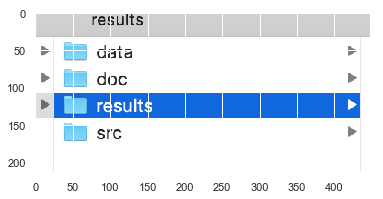

In [2]:
# Working Directory Setup Evidence
dirPic = mpimg.imread("AS1/workdir.png")
implot = plt.imshow(dirPic)

### 2.7 Get the Data.

In [3]:
# Read train and test data of 762 assignment
df = pd.read_csv('AS1/train.csv', index_col=0)
test = pd.read_csv('AS1/test.csv', index_col=0)
df.head() # Show the first five rows

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1474,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1860,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1444,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
2858,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
1101,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Show information about dataframe.
* 80 columns, means 79 explanatory variables.<br>
* Some variables have data missing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1474 to 1489
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 n

Run simple exploratory analysis on all the data.
* Determines there are 37 numerical variables in the data set (however some of these are discrete!)
* Determines the means, quartiles and other relevant statistics for these numerical variables

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180923.935616
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79440.814521
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2.8 Convert the data to a format you can easily manipulate.

Having read in a csv file using pandas, the data is already in a pandas DataFrame object and is ready to be manipulated as needed. However, we are able to further divide the training data into numerical and categorical dataframes. We have chosen to exclude some values from the numerical dataframe since they are discrete numbers (codes, years etc) and are hence categorical!

In [6]:
df_numeric = df.select_dtypes(include=["number"]).drop(['MSSubClass', 'MoSold', 'YrSold'], axis=1)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1474 to 1489
Data columns (total 34 columns):
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1379 non-null floa

In [7]:
df_cat = df.select_dtypes(include = 'object')
df_cat = pd.concat([df.loc[:, ['MSSubClass','MoSold','YrSold']],df_cat], axis=1, sort=True)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 2929
Data columns (total 46 columns):
MSSubClass       1460 non-null int64
MoSold           1460 non-null int64
YrSold           1460 non-null int64
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 no

Hence, we can make the following observations from the steps above:

* There are 34 numerical variables (3 of them are discrete and relate to categorical values)
* There are 46 categorical variables in the data set

### 2.9 Check the size and and type of data.

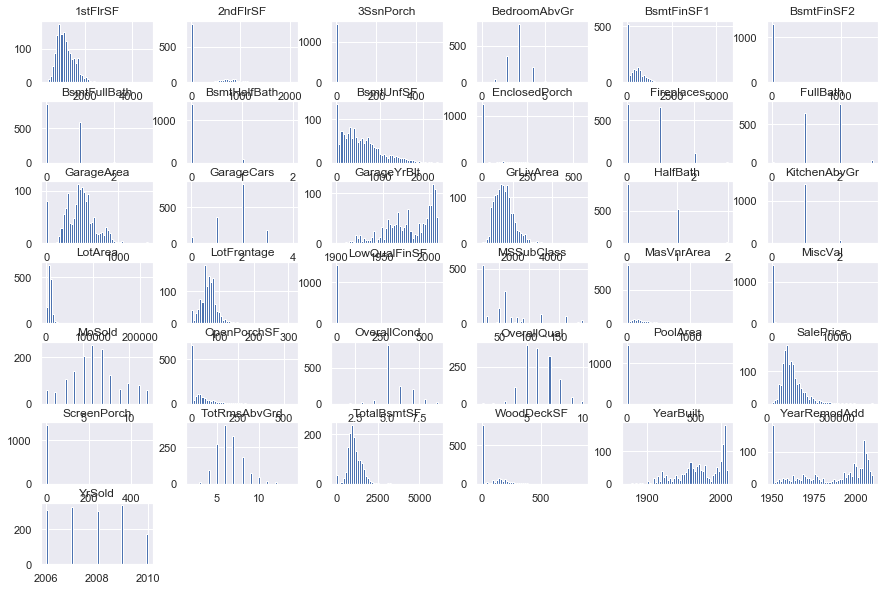

In [8]:
# Create a copy of the training data
df1 = df

# Display a histogram for each numerical value
df1.hist(bins=50,figsize = (15,10)) # Note that some of these data are clearly discrete
plt.show()

Note, some of the variables are discrete (e.g. MSSubClass uses numbers as codes to represent different dwelling types)

### 2.10 Ensure sensitive information is deleted of protected.

All public through Kaggle. This step is not relevant.

### 2.11 Sample a test set, put it aside, and never look at it.

This test set has been pre-sampled and split on Kaggle, hence does not need to be split into a test and train set again.

### 2.12 Check your workspace setup.

This step is not relevant for (at least Part I of) the assignment.

## 3. Explore the Data

### 3.1 Create a Jupyter notebook to keep a record of your data exploration.
This Jupyter notebook will be used for this purpose

### 3.2 Study each attribute and its characteristics

In [9]:
# df.info
# df.sort_values(['Id'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1474,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1860,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1444,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
2858,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
1101,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
986,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
1791,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
583,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
1348,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


There are 1460 rows (data points) and 80 columns (79 explanatory variables and an index)

In [10]:
def explore(feature, 
            workaround=False # circumvent error in matplotlib
           ):
    # http://stackoverflow.com/questions/40070093/gridspec-on-seaborn-subplots
    gridkw = dict(height_ratios=[5, 1])
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw, sharex=True)
    sns.distplot(feature, ax=ax1, kde=False) #array, top subplot
    sns.boxplot(feature, ax=ax2, width=.4) #bottom subplot
    ax1.set_xlabel('') 
    if workaround:
        print(feature.describe())
    else:
        ax1.text(1.05, 0.95, 
             feature.describe(), 
             transform=ax1.transAxes, fontsize=14,
            verticalalignment='top')
    #http://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
    fig.subplots_adjust(top=0.9)
    fig.suptitle(feature.name, fontsize=16)

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count      1460.000000
mean     180923.935616
std       79440.814521
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


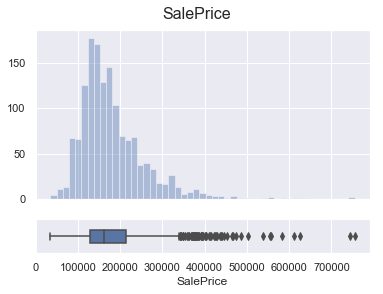

In [11]:
explore(df.SalePrice, workaround = True)

The median sale price in Ames, Iowa is. House prices are slightly right-skewed with a mean at \$180,924. The middle 50\% of prices range between \$130,000 and \$214,000, and the median house price is $160,000.

## 3.4 Visualise the data.

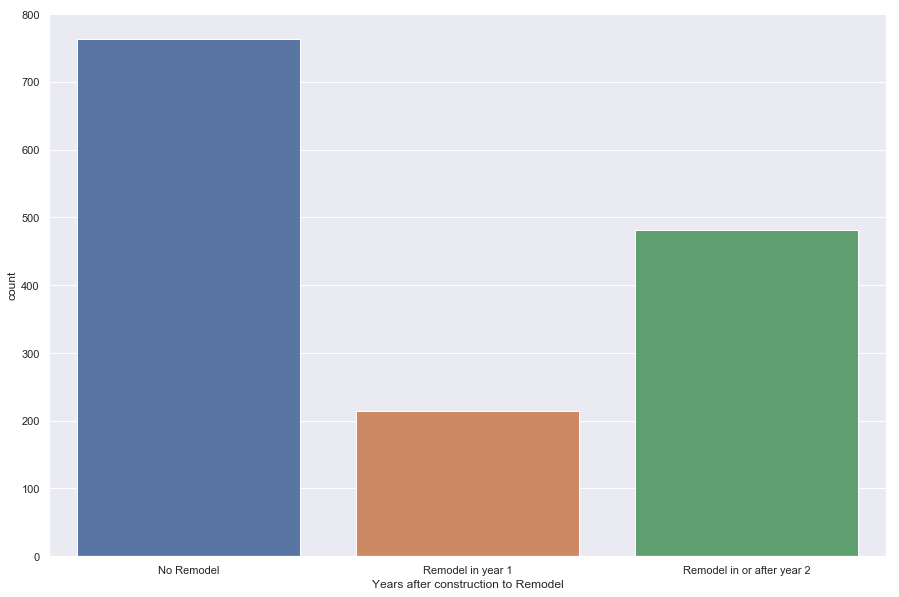

In [12]:
f, ax = plt.subplots(figsize=(15, 10))
df_1 = df_numeric.copy()
df_1['remodel_yrs_since_construction'] = df_1.YearRemodAdd - df_1.YearBuilt

df_1.loc[df_1.remodel_yrs_since_construction < 1, 'Years after construction to Remodel'] = 'No Remodel'
df_1.loc[df_1.remodel_yrs_since_construction == 1, 'Years after construction to Remodel'] = 'Remodel in year 1'
df_1.loc[df_1.remodel_yrs_since_construction > 1, 'Years after construction to Remodel'] = 'Remodel in or after year 2'

sns.countplot(x="Years after construction to Remodel", data=df_1);

### 3.4.1 Interpretation

It appears the majority of houses in Ames, Iowa are built then have no remodel done to them. Houses that do have a remodel tend to have them in year 1 which indicates the interiors of the households might be remodeled in the year following construction. We noticed houses remodelled more than 1 year tend to be remodelled between year 2 and 55 and are fairly randomly distributed as to how long after construction that remodel occurs. As such, this distribution has a very long tail which has been truncated to make a "year 2 or after" bin for the histogram. 

Overall, it appears roughly just under half the houses are remodelled, with the most popular timeframe for remodel being one year after construction

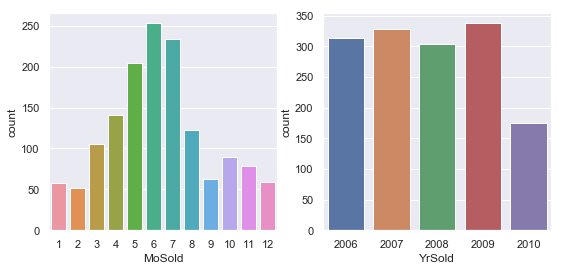

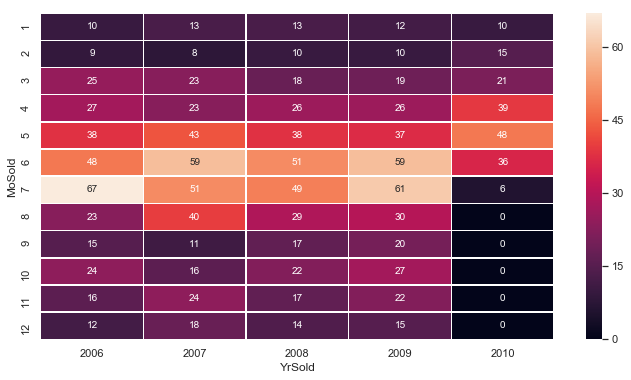

In [13]:
f, ax = plt.subplots(1, 2, figsize=(9,4))
sns.countplot(x = "MoSold", data = df, ax=ax[0])
sns.countplot(x = "YrSold", data = df, ax=ax[1])

df_heat = df.loc[:, ['YrSold','MoSold','SalePrice']]
df_heat = df_heat.sort_values(["YrSold","MoSold"], axis=0, ascending=[True,True], inplace=False)
df_heat = df_heat.groupby(['YrSold', 'MoSold']).count()
df_heat.reset_index(inplace=True)  

sales_by_date = df_heat.pivot("MoSold", "YrSold", "SalePrice")
sales_by_date.fillna(0, inplace=True)
sales_by_date = sales_by_date.astype(np.int64)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(11.5, 6))
sns.heatmap(sales_by_date, annot=True, fmt="d", linewidths=.5, ax=ax)

### 3.4.2 Interpretation

In the first two graphs shown, the late-spring to early-summer months (May-July) are when the most houses appear to be sold on average (over the 5 year period). The sale of houses over the years is roughly consistent from 2006-2009 (excluding 2010 due to the data having been collected part-way through 2010).

This trend is more granularly reflected on the heat map in the third graph. In each individual year, more houses are sold in those same three late-spring and early-summer months (May-July). Fewer houses appear to be sold in colder months.

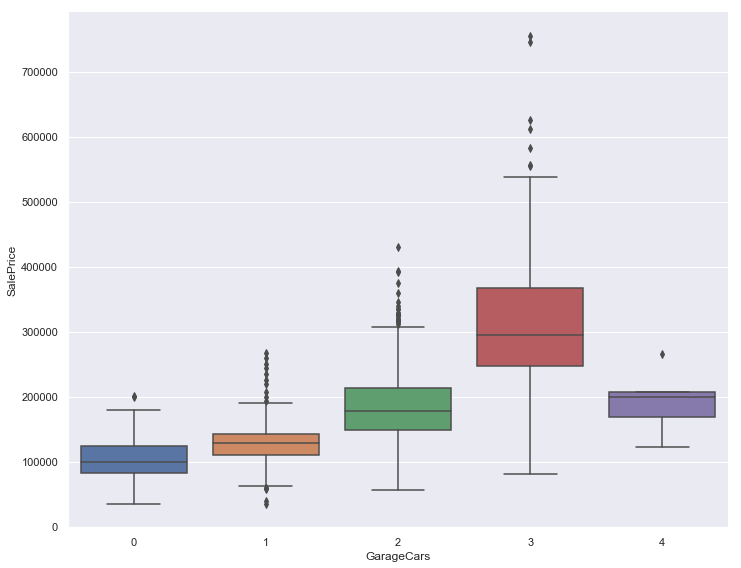

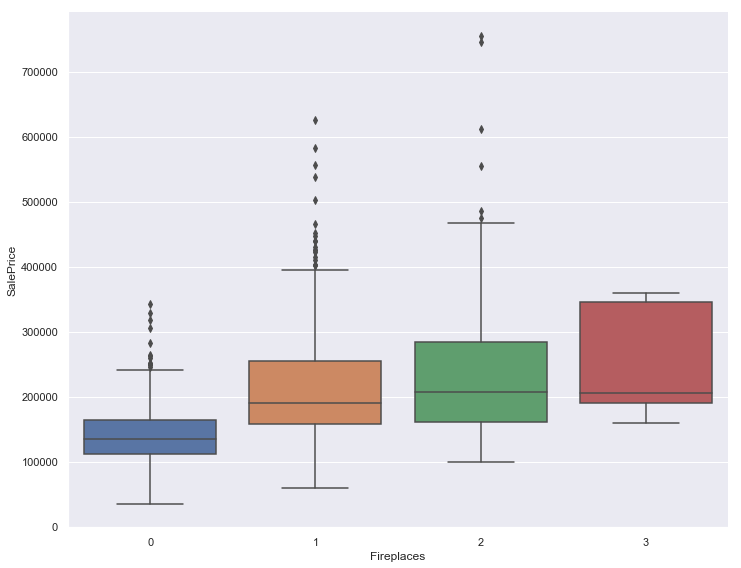

In [14]:
df2 = df.dropna(axis=1)

sns.catplot(x="GarageCars", y="SalePrice", kind="box", data=df2, height=8, aspect=1.3);
sns.catplot(x="Fireplaces", y="SalePrice", kind="box", data=df, height=8, aspect=1.3);

### 3.4.3 Interpretation

The relationship between Sales price and two different categorical variables (Garage Car Capacity and Number of Fireplaces) have been plotted.

First, we notice with an increasing car capacity of garages, the median house prices tend to rise. This trend appears to hold for 0-3 car-garages. However, interestingly enough, houses with 4 car-garage appear to have **lower** median sale prices. This could simply be due to there being a relativealy smaller number of such houses, but this is nonetheless an interesting observation.

Secondly, as expected, the median house price rises with the number of fireplaces posessed in the house.

These two trends in median house price are quite likely due to the increased physical space taken to accommodate an additional car in a garage or an additional fireplace. More space indicates a more expensive house price. The one point of interest is that houses with the 4 car-garages have a lower median sale prices than 3 car-garages.

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


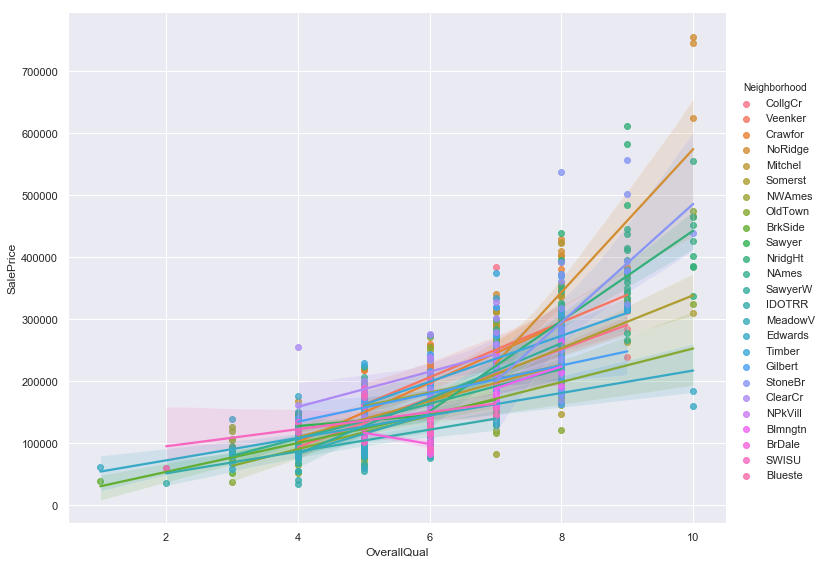

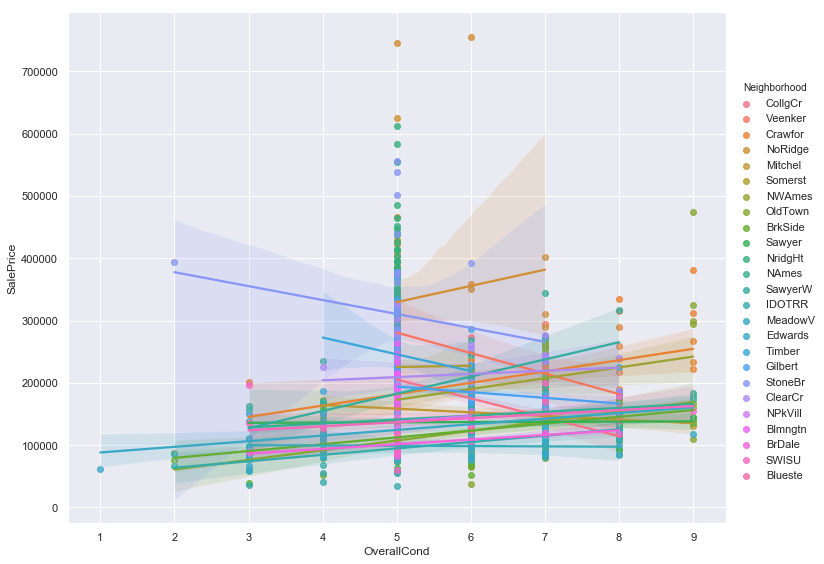

In [15]:
sns.set()
# sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=df, height=8, aspect=1.3);
f = sns.lmplot(x="OverallQual", y="SalePrice", hue='Neighborhood', data=df, truncate=True, height=8, aspect=1.3);
# sns.catplot(x="OverallCond", y="SalePrice", kind="box", data=df, height=8, aspect=1.3);
g = sns.lmplot(x="OverallCond", y="SalePrice", hue='Neighborhood', data=df, truncate=True, height=8, aspect=1.3);

### 3.4.4 Interpretation

Interestingly, there is a trend of increasing sale price as Overall Quality increases, however there is no such trend with sales price as Overall Condition increases. 

This might be because, regardless of the neighbourhood, buyers are generaly willing to pay more for a home that has been built to a higher quality (strong foundation, structurally sound, good utilities, and internal wiring etc). 

Buyers, however, are not **necessarily** willing to pay more for a house that is in good condition. This may be because a house in poor condition can be improved easily through remodelling whereas a house built with poor quality materials cannot be improved as easily. Hence the same trend we noticed with Overall Quality is not exhibited with Overall Condition.

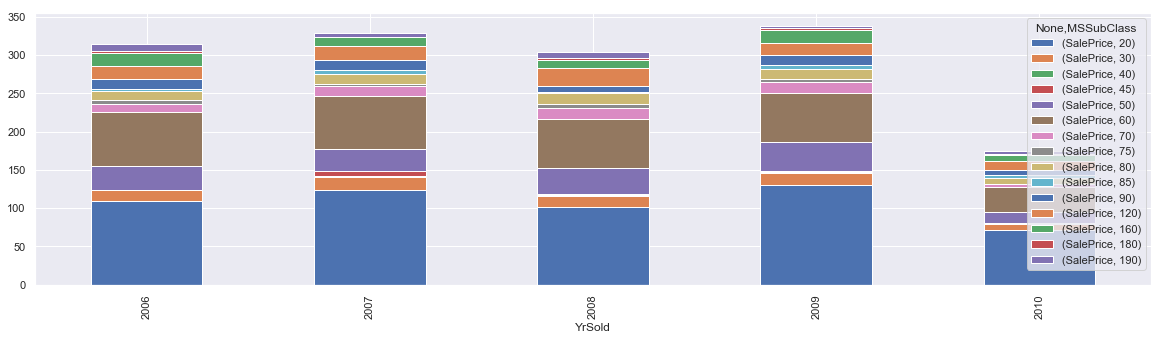

In [16]:
df1 = df.loc[:, ['YrSold','MSSubClass','SalePrice']]
df2 = df1.groupby(['YrSold', 'MSSubClass']).count().unstack()
df2.plot(kind='bar', figsize=(20,5), stacked = True)

### 3.4.5 Interpretation

This graph attempts to show the number of houses sold each year, broken down by the MSSubClass Code which indicates the type of dwelling.

Fristly, looking at the total number of houses sold, it appears to be fairly consistent over 2006-2009, the years for which we have complete data. With only a slight dip in 2008 followed by a healthy correction in 2009, it appears the Ames housing marketing was not too badly hit by the American Housing Crisis (GFC) in 2008 in terms of **number of houses sold**.

Further, the SubClass codes "20", "60" and "50" are by far the most prevalent type of dwelling sold in Ames, Iowa. These codes correspond to the following dwelling types respectively: "1-STORY 1946 & NEWER ALL STYLES", "2-STORY 1946 & NEWER" and "1-1/2 STORY FINISHED ALL AGES".


### 3.4.6 Additional Visualisations

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


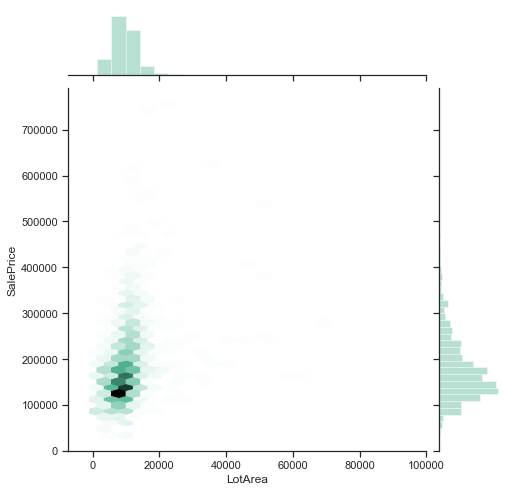

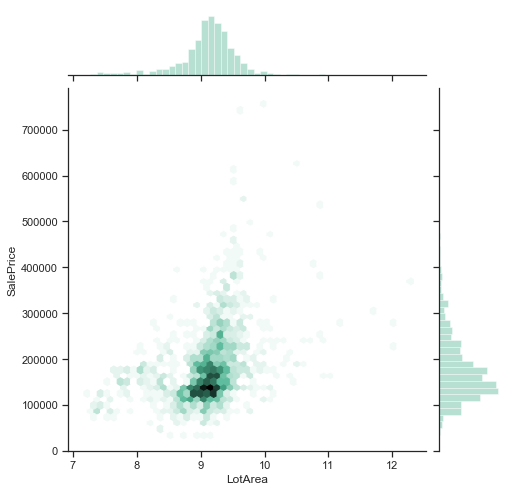

In [17]:
sns.set(style="ticks")
g = sns.jointplot(df.LotArea, "SalePrice", data=df, kind="hex",
                  xlim=(-7500, 100000), 
                  color="#4CB391", height=7)
g = sns.jointplot(np.log(df.LotArea), "SalePrice", data=df, kind="hex",
                  color="#4CB391", height=7)

### 3.4.6.1 Interpretation

Having taken the log of LotArea, we can see its marginal distribution starting to approximate something that looks a little more normal which allows more accurate predictions on the house price to be made using the log transformed explanatory data.

## 3.5 Study the correlations between attributes.

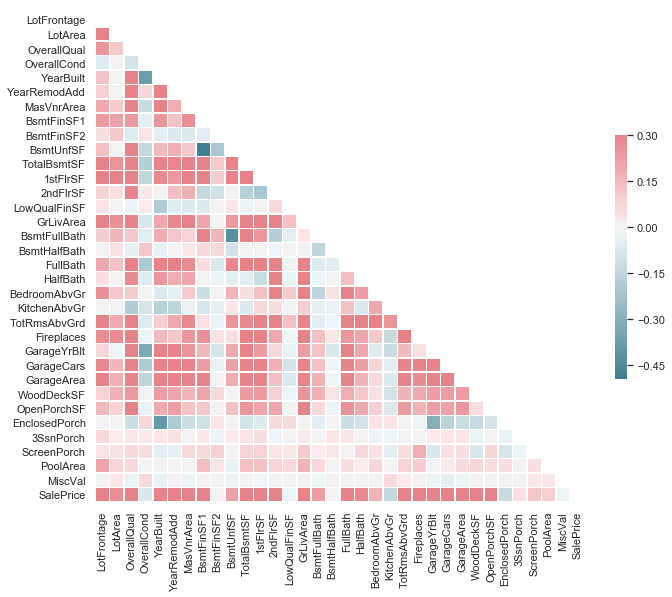

In [18]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

The corrs plot shows the correlations of all numerical variables with each other. We are interested in the correlations of the sales price with other variables. As we can see, Sales Price is correlated with quite a few variables, however, on further examination, many of those variables have correlations with each other indicating multi-collinearity might be a factor here. For instance, The car capacity of a garage is correlated with the area of the garage. This means many of the variables correlated to Sales Price may not actually be needed to explain Sales Price.

### 3.6 Engineer features and identify useful transformations.

In [19]:
# ... Later...

### 3.7 Study how you would solve this problem manually
I'd take a course in old-school pre-computer real estate and property market studies. Techniques would likely include a rudimentary form of comparing certain attributes regarding individual houses, city blocks and neighbourhoods, and other factors that go into quoting a value of a house. This would also involve determining how much value a buyer places on different features (e.g. is number of cars in a garage as important as having a wrap around porch) and so on. It would be quite difficult to get any consistent methodology for this, however.

### 3.8 Identify extra data that would be useful

Neighbourhood wealth, neighbourhood incomes, schools per neighbourhood (decile is function of income), demographic information.

### 3.9 Document what you have learnt

